In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import re

In [7]:
#Ignore Warning
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Load datasets
training_file_path = 'twitter_training.csv'
validation_file_path = 'twitter_validation.csv'

training_data = pd.read_csv(training_file_path, encoding='latin1', header=None)
validation_data = pd.read_csv(validation_file_path, encoding='latin1', header=None)

# Assign column names
columns = ['ID', 'Category', 'Sentiment', 'Text']
training_data.columns = columns
validation_data.columns = columns

# Combine datasets for preprocessing
combined_data = pd.concat([training_data, validation_data], ignore_index=True)

# Preprocessing function
def clean_text(text):
    if not isinstance(text, str):  # Check if the input is not a string
        return ""  # Replace with an empty string
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    text = text.strip()  # Remove leading/trailing whitespace
    return text

# Fill missing values in 'Text' column with an empty string
combined_data['Text'] = combined_data['Text'].fillna("")

# Apply the cleaning function
combined_data['Cleaned_Text'] = combined_data['Text'].apply(clean_text)

# Encode target labels
label_encoder = LabelEncoder()
combined_data['Encoded_Sentiment'] = label_encoder.fit_transform(combined_data['Sentiment'])

# Split back into training and validation sets
train_data = combined_data.iloc[:len(training_data)]
val_data = combined_data.iloc[len(training_data):]

# Prepare data for modeling
X_train = train_data['Cleaned_Text']
Y_train = train_data['Encoded_Sentiment']
X_val = val_data['Cleaned_Text']
Y_val = val_data['Encoded_Sentiment']

# Create a pipeline with TF-IDF and Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('classifier', LogisticRegression(max_iter=200))
])

# Train the model
pipeline.fit(X_train, Y_train)

# Predict on validation data
Y_pred = pipeline.predict(X_val)

# Evaluation
accuracy = accuracy_score(Y_val, Y_pred)
classification_rep = classification_report(Y_val, Y_pred, target_names=label_encoder.classes_)

# Getting Accuracy
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.79      0.72      0.75       172
    Negative       0.77      0.89      0.83       266
     Neutral       0.85      0.73      0.78       285
    Positive       0.81      0.86      0.83       277
   Sentiment       0.00      0.00      0.00         1

    accuracy                           0.80      1001
   macro avg       0.64      0.64      0.64      1001
weighted avg       0.81      0.80      0.80      1001



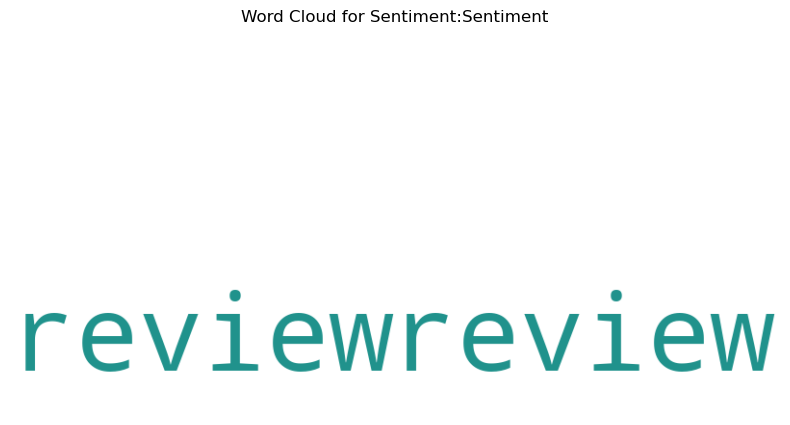

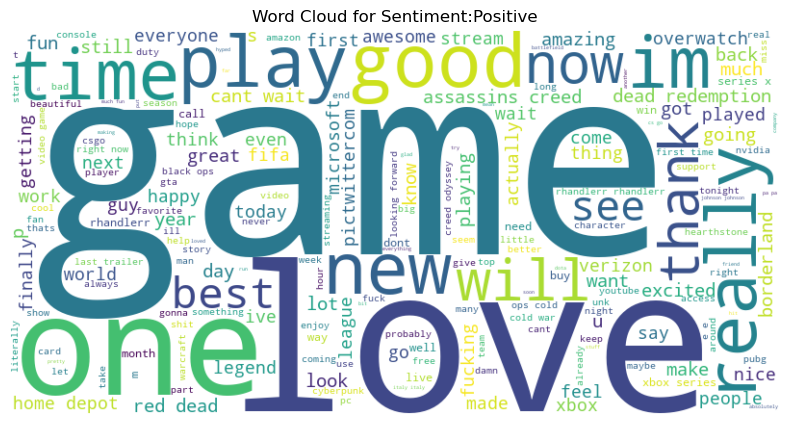

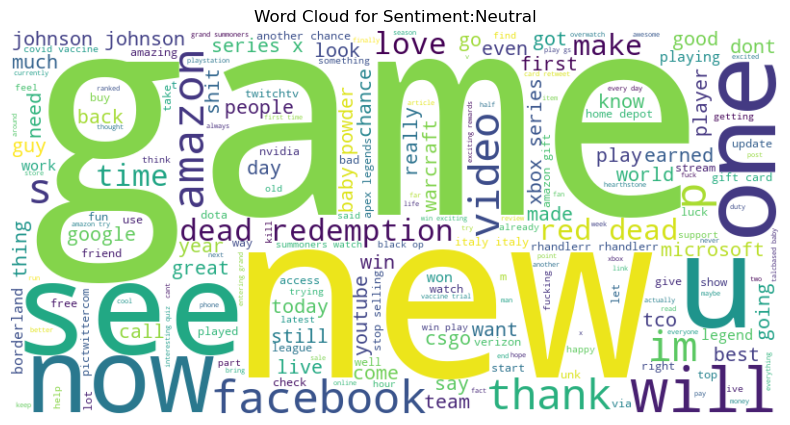

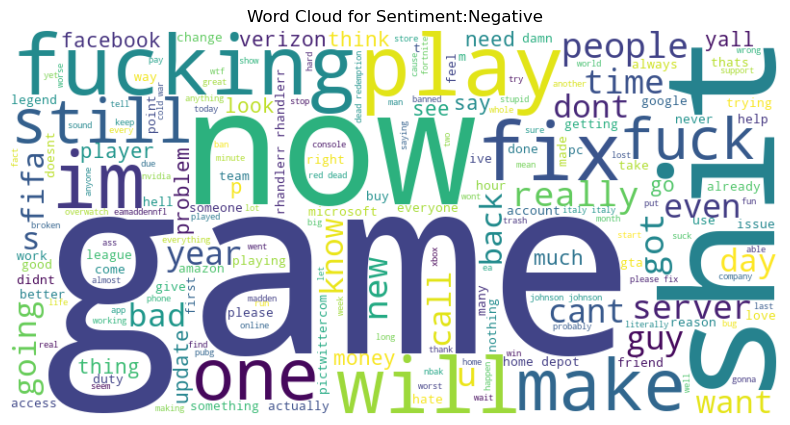

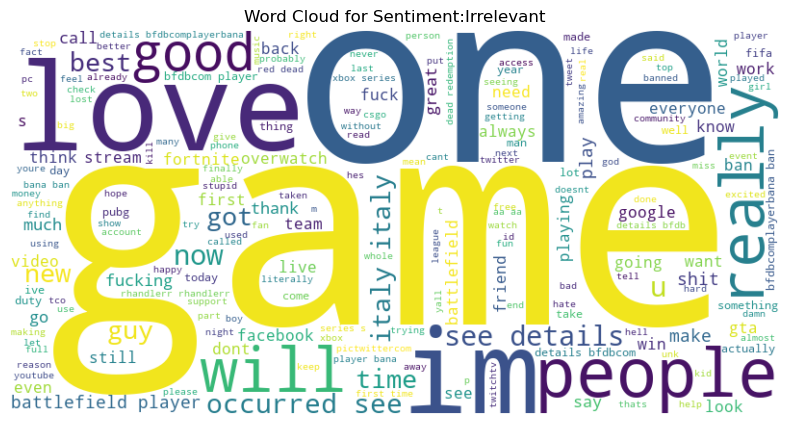

In [11]:
from wordcloud import WordCloud
#Display the most common words in the Cleaned_Text for each sentiment category
for sentiment in combined_data['Sentiment'].unique():
    text="".join(combined_data[combined_data['Sentiment']==sentiment]['Cleaned_Text'])
    wordcloud=WordCloud(width=800,height=400,background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.title(f"Word Cloud for Sentiment:{sentiment}")
    plt.axis('off')
    plt.show()

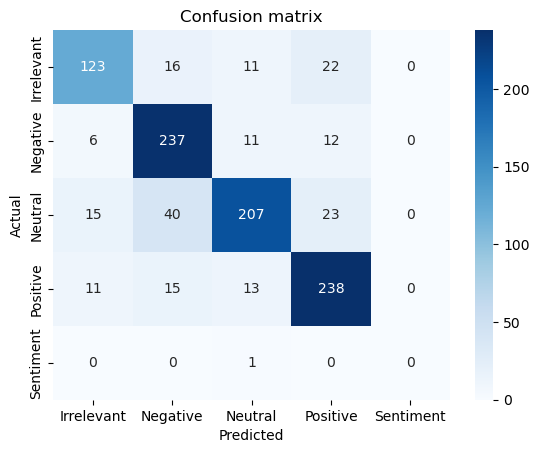

In [15]:
# visualize the confusion matrix to eveluate model predictions

cm=confusion_matrix(Y_val, Y_pred)

sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


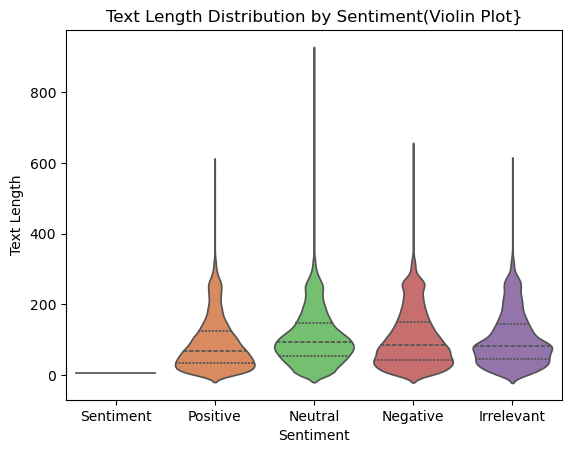

In [17]:
combined_data['Text_Length']=combined_data['Cleaned_Text'].apply(len)
#Analyze the distribution of text lengths in tweets across sentiment categories
sns.violinplot(data=combined_data, x='Sentiment', y='Text_Length', palette='muted', inner="quartile")
plt.title("Text Length Distribution by Sentiment(Violin Plot}")
plt.xlabel("Sentiment")
plt.ylabel("Text Length")
plt.show()